### Crime
It seems obvious that most parents want their children to be safe. One of the ways a lot of parents attempt to do this is by living in an area with the least crime. In this section, we will analyze which neighborhood is the safest by means of crime.
<p align= "center" >
<img src="https://upload.wikimedia.org/wikipedia/commons/6/63/Pitt_Police_Squad_Car.jpg" width="400" >
</p>
https://upload.wikimedia.org/wikipedia/commons/6/63/Pitt_Police_Squad_Car.jpg

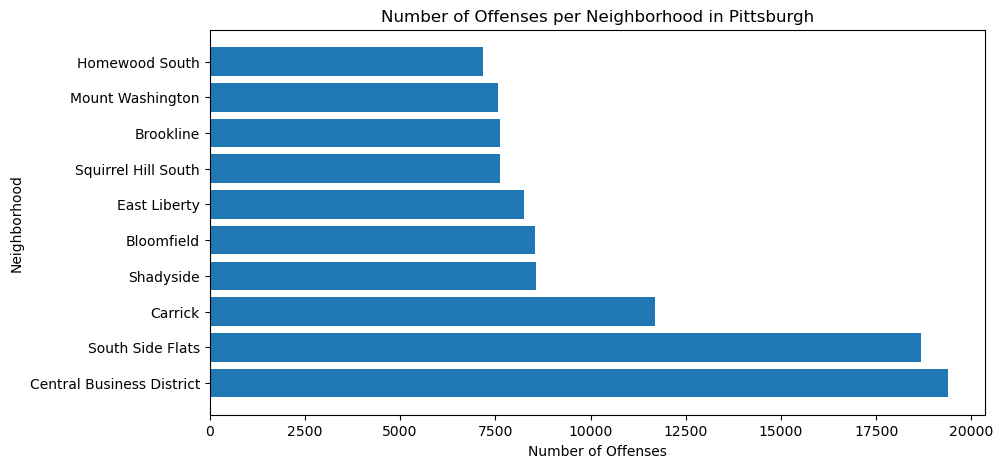

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('CrimeReports.csv')

# Assuming 'INCIDENTNEIGHBORHOOD' and 'OFFENSES' are columns in your data
# You might need to calculate 'crime_rate' based on other columns
crime_data = data[['INCIDENTNEIGHBORHOOD', 'OFFENSES']]

# Group the data by neighborhood and calculate total offenses
grouped = crime_data.groupby('INCIDENTNEIGHBORHOOD').count()

# Sort the data
sorted_data = grouped.sort_values(by='OFFENSES', ascending=False)

# Plot the data
plt.figure(figsize=(10, 5))  # Adjust as needed
plt.barh(sorted_data.index[:10], sorted_data['OFFENSES'][:10])  # We only plot the top 10
plt.xlabel('Number of Offenses')
plt.ylabel('Neighborhood')
plt.title('Number of Offenses per Neighborhood in Pittsburgh')
plt.show()


### This graph shows an overall number of offenses per neighborhood since 2016, showing most relevant neighborhoods. The neighborhood with the least offenses is Homewood South with about 7500 offenses in total and the CBD areas and South Side Flats having the most offenses.

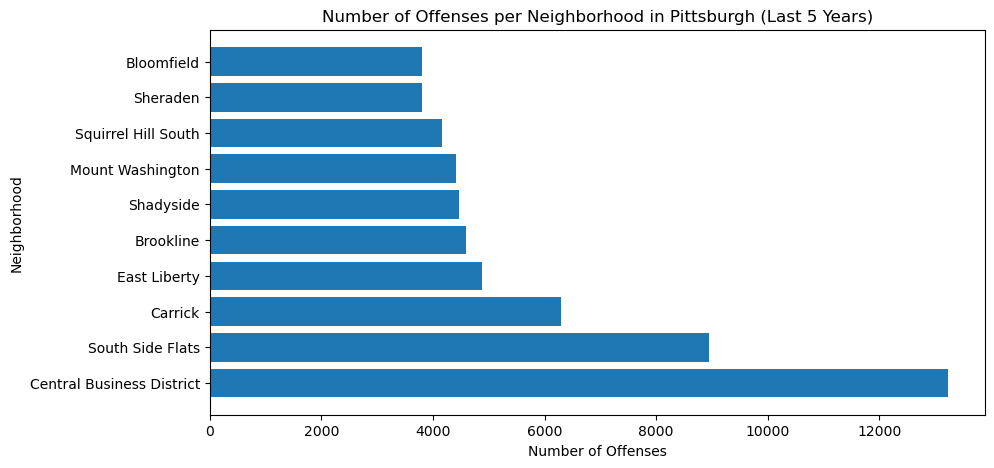

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Load the data
data = pd.read_csv('CrimeReports.csv')

# Assuming 'INCIDENTNEIGHBORHOOD', 'OFFENSES', and 'INCIDENTTIME' are columns in your data
# Convert 'INCIDENTTIME' column to datetime
data['INCIDENTTIME'] = pd.to_datetime(data['INCIDENTTIME'])

# Get the date 5 years ago from today
five_years_ago = datetime.now() - timedelta(days=5*365)

# Filter data for the last 5 years
recent_data = data[data['INCIDENTTIME'] >= five_years_ago]

# Select 'INCIDENTNEIGHBORHOOD' and 'OFFENSES' columns
crime_data = recent_data[['INCIDENTNEIGHBORHOOD', 'OFFENSES']]

# Group the data by neighborhood and calculate total offenses
grouped = crime_data.groupby('INCIDENTNEIGHBORHOOD').count()

# Sort the data
sorted_data = grouped.sort_values(by='OFFENSES', ascending=False)

# Plot the data
plt.figure(figsize=(10, 5))  # Adjust as needed
plt.barh(sorted_data.index[:10], sorted_data['OFFENSES'][:10])  # We only plot the top 10
plt.xlabel('Number of Offenses')
plt.ylabel('Neighborhood')
plt.title('Number of Offenses per Neighborhood in Pittsburgh (Last 5 Years)')
plt.show()


### This graph shows the number of crime offenses in the last 5 years. This also shows the top 10 highest crime neighborhoods, including the CBD dense area, obviously having the highest number of offenses since it contains businesses, shops, and other financially rich zones. The other highest neighborhood here is the South Side Flats, having about 9000 offenses since 2018. 

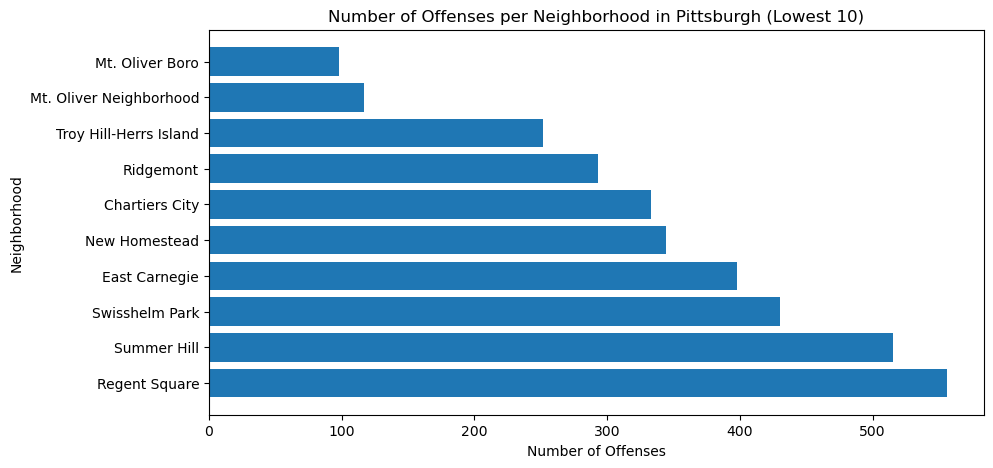

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('CrimeReports.csv')

# List of neighborhoods to exclude
exclude_neighborhoods = ['Outside County', 'Outside State', 'Mount Oliver']

# Filter out unwanted neighborhoods
data = data[~data['INCIDENTNEIGHBORHOOD'].isin(exclude_neighborhoods)]

# Standardize 'Mount Oliver' neighborhood names
data['INCIDENTNEIGHBORHOOD'] = data['INCIDENTNEIGHBORHOOD'].replace(['Mount Oliver 1', 'Mount Oliver 2'], 'Mount Oliver')

# Assuming 'INCIDENTNEIGHBORHOOD' and 'OFFENSES' are columns in your data
crime_data = data[['INCIDENTNEIGHBORHOOD', 'OFFENSES']]

# Group the data by neighborhood and calculate total offenses
grouped = crime_data.groupby('INCIDENTNEIGHBORHOOD').count()

# Sort the data in ascending order
sorted_data = grouped.sort_values(by='OFFENSES', ascending=True)

# Plot the data
plt.figure(figsize=(10, 5))  # Adjust as needed

# We only plot the bottom 10, but reverse the order for the plot
plt.barh(sorted_data.index[:10][::-1], sorted_data['OFFENSES'][:10][::-1])

plt.xlabel('Number of Offenses')
plt.ylabel('Neighborhood')
plt.title('Number of Offenses per Neighborhood in Pittsburgh (Lowest 10)')
plt.show()


### These 10 neighborhoods contain the lowest amount of offenses since 2016, with Mt. Oliver having the lowest with only about 100 offenses since 2016. Swissheim Park lands the top of this list with a little over 400 offenses. 
    Here is Mt. Oliver below:

<p align= "center" >
<img src="https://imagescdn.homes.com/i2/6Zbc0Uea4lwPI_GUybTuj-hyoQGulkf-WigCO7saqpU/111/mt-oliver-borough-mount-oliver-pa-2.jpg?p=1" width="1000" height="600">
</p>
    Photo by: https://www.homes.com/mount-oliver-pa/neighborhood/mt-oliver-borough/


,INCIDENTNEIGHBORHOOD,Overall_score
16,Central Business District,1.000000
78,South Side Flats,0.963725
15,Carrick,0.603199
74,Shadyside,0.442312
9,Bloomfield,0.440970
...,...,...
73,Ridgemont,0.015119
91,Troy Hill-Herrs Island,0.013003
64,Outside County,0.012590
57,Mt. Oliver Neighborhood,0.006037


Text(0.5, 1.0, 'Overall Crime Score by Neighborhood')

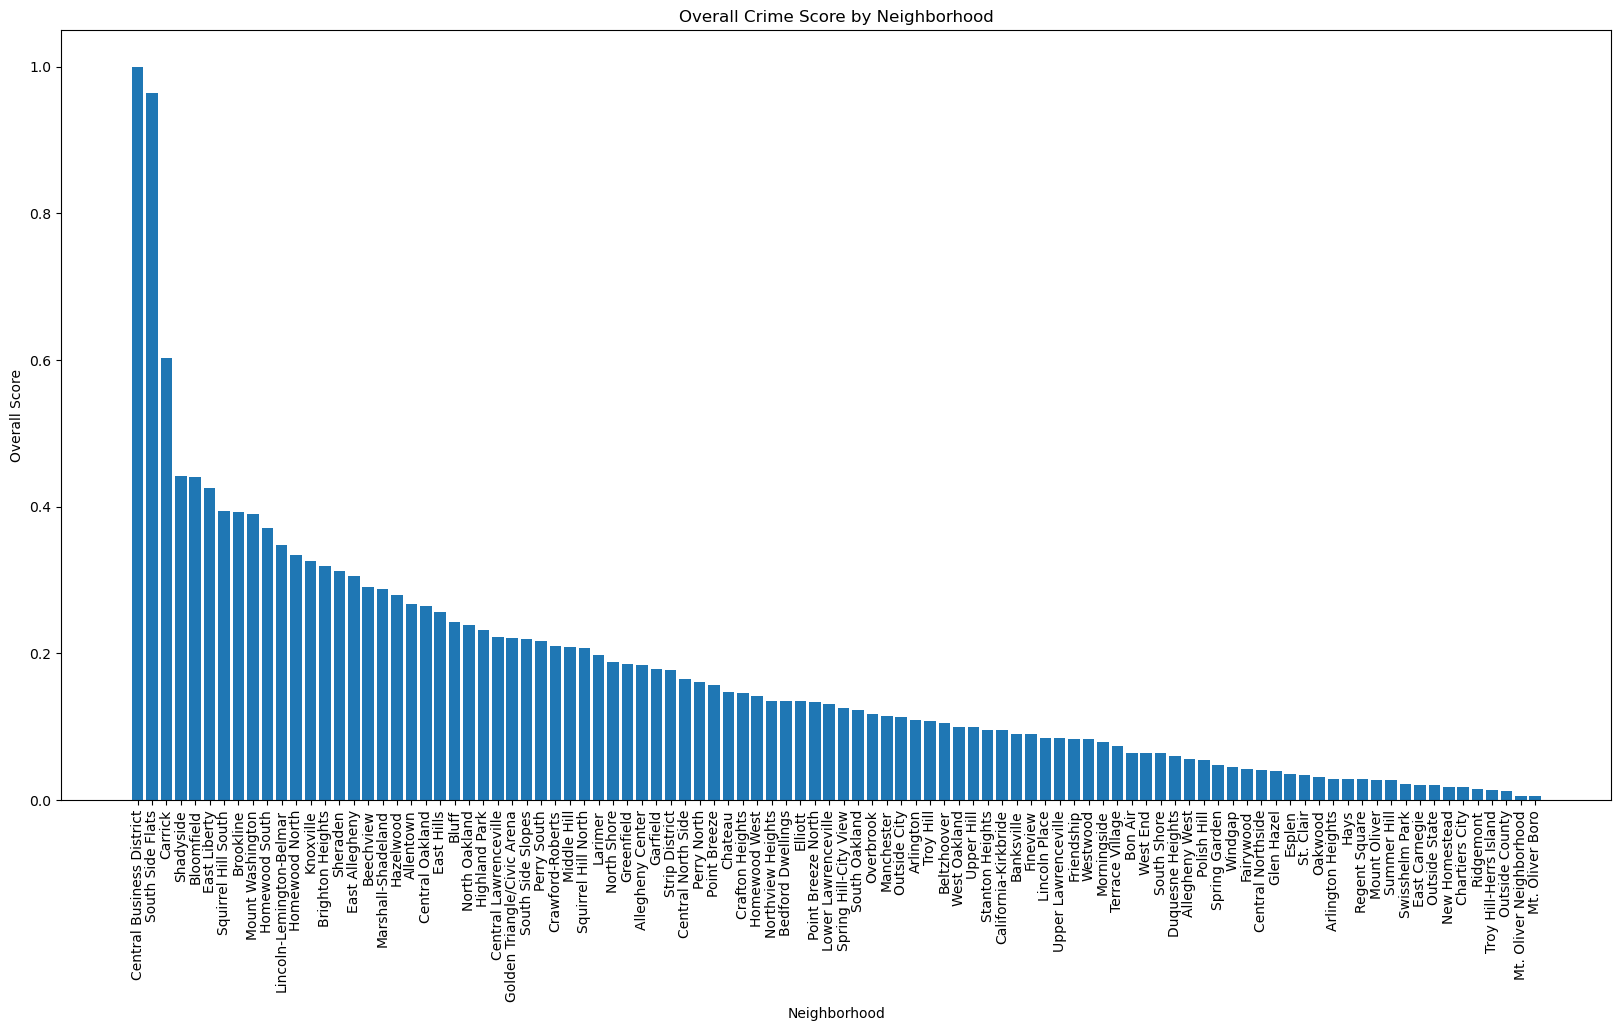

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the crime data
crime_df = pd.read_csv('CrimeReports.csv')

# Assuming 'INCIDENTNEIGHBORHOOD' and 'OFFENSES' are columns in your crime data
crime_data = crime_df[['INCIDENTNEIGHBORHOOD', 'OFFENSES']]

# Group the crime data by neighborhood and calculate total offenses
grouped = crime_data.groupby('INCIDENTNEIGHBORHOOD').count()
# Calculate the overall score (you can modify this formula as needed)
grouped['Overall_score'] = (grouped['OFFENSES']/grouped['OFFENSES'].max())

# Select only the required columns and sort by overall score
grouped.reset_index(inplace=True)
final_data = grouped[['INCIDENTNEIGHBORHOOD', 'Overall_score']].sort_values(by='Overall_score', ascending=False)

# Export DataFrame to CSV in the root directory of the project
final_data.to_csv('../export_crime.csv')

# Display the DataFrame
display(final_data)

# Plot the data
plt.figure(figsize=(20,10))
plt.bar(final_data['INCIDENTNEIGHBORHOOD'], final_data['Overall_score'])
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Overall Score')
plt.title('Overall Crime Score by Neighborhood')
